# Differansemetoder

I forrige delkapittel presenterte vi konseptet *differensiering*, og så på én måte det kan brukes til å utføre *numerisk derivasjon*. Metoden vi fokuserte på er gitt nedenfor i formel $1.3$, og er kjent som *foroverdifferanse*. Andre metoder som ligner veldig i prinsipp er *bakoverdifferanse* (formel $1.4$) og *senterdifferanse* (formel $1.5$).

### Foroverdifferanse
Formel:
$$ f(x) \approx \frac{f(x+h)-f(x)}{h} \tag{1.3}$$

Regner ut differansen mellom to funksjonsverdier i punktet $x$, og et punkt som ligger en distanse $h$ lengre *foran* på x-aksen.

### Bakoverdifferanse
Formel:
$$ f(x) \approx \frac{f(x)-f(x-h)}{h} \tag{1.4}$$

Regner ut differansen mellom to funksjonsverdier i punktet $x$, og et punkt som ligger en distanse $h$ lengre *bak* på x-aksen.

### Senterdifferanse
Formel:
$$ f(x) \approx \frac{f(x+h)-f(x-h)}{2h} \tag{1.5}$$

Gjennomsnittet av foroverdifferanse og bakoverdifferanse. 

<br>
Kodecellen nedenfor vil laste inn et interaktivt plot som demonstrerer prinsippet bak disse tre forskjellige differansemetodene. Demoen tar utgangspunkt i å studere funksjonen $f_1 = x^3-2x^2 + 1$, i intervallet $0\leq x \leq 2$, men det er også fullt mulig å modifisere denne funksjonen.

*PS. Det kan hende det tar litt tid før figuren vises. Vennligst vær tålmodig.*

Output()

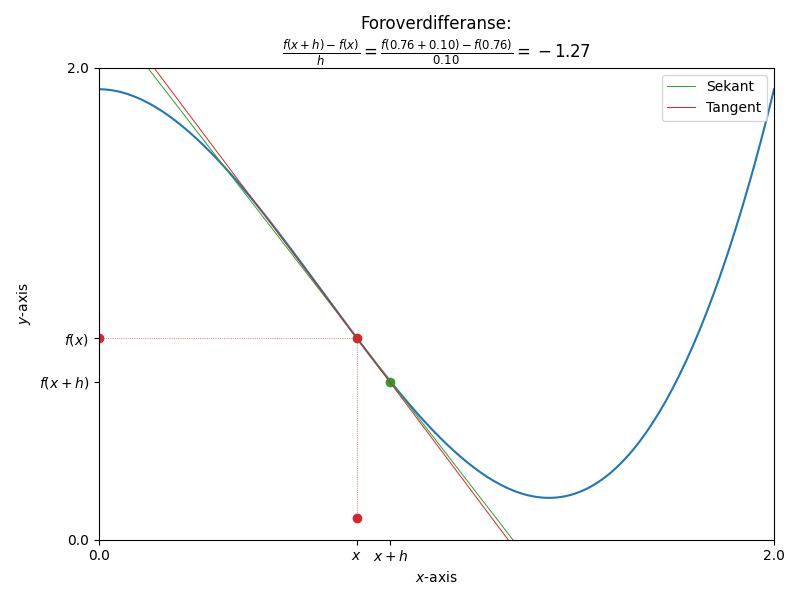

In [24]:
from demoer import NumDiffDemo
%matplotlib ipympl

def f_1(x):
    y = x**3-2*x**2 +1
    return y

# Presenter et interaktivt plot som illustrerer differansemetodene for f_1(x) mellom x=0 og x=2:
NumDiffDemo(func = f_1, xlim = (0, 2));



> #### Eksempel 1:
> Bruk *foroverdifferanse* til å estimere $f'(0)$ for funksjonen $f(x) = e^x$ gitt skrittlengden $h=0.25$, og bruk uttrykket $f'(x) = e^x$ til å regne ut avviket $\epsilon$:
>
> $$
\begin{align}
f'(0) &\approx \frac{e^{0+0.25}-e^{0}}{0.25} \\
    &= \frac{1.284 - 1}{0.25}\\
    &= 0.284\cdot 4 \\
     &= 1.136
\end{align}
$$
> Avvik:
>$$
\begin{align}
\epsilon &= |1.136 - f'(0)| \\
    &= |1.136 - 1.0|\\
    &= 0.136 
\end{align}
$$

> #### Eksempel 2:
> Bruk *bakoverdifferanse* til å estimere $f'(0)$ for funksjonen $f(x) = e^x$ gitt skrittlengden $h=0.25$, og bruk uttrykket $f'(x) = e^x$ til å regne ut avviket $\epsilon$:
>
> $$
\begin{align}
f'(0) &\approx \frac{f(0)-f(0-0.25)}{0.25} \\
    &= \frac{1-0.779}{0.25}\\     &= 0.221\cdot 2 \\
    &= 0.884
\end{align}
$$
> Avvik:
>$$
\begin{align}
\epsilon &= |0.884 - f'(0)| \\
    &= |0.884 - 1.0|\\
    &= 0.116
\end{align}
$$


> #### Eksempel 3:
> Bruk *senterdifferanse* til å estimere $f'(0)$ for funksjonen $f(x) = e^x$ gitt skrittlengden $h=0.25$, og bruk uttrykket $f'(x) = e^x$ til å regne ut avviket $\epsilon$:
>
> $$
\begin{align}
f'(0) &\approx \frac{f(0 + 0.25)-f(0-0.25)}{2\cdot 0.25} \\
    &= \frac{1.284-0.779}{0.4}\\
    &= 0.505\cdot 2 \\
     &= 1.01
\end{align}
$$
> Avvik:
>$$
\begin{align}
\epsilon &= |1.01 - f'(0)| \\
    &= |1.01 - 1.0|\\
    &= 0.01
\end{align}
$$

Som vi kan se fra regneeksempelet vil foroverdifferanse overestimere og bakoverdifferanse underestimere funksjonens deriverte. Dette er fordi $f'' > 0$ for denne funksjonen, noe som betyr at den deriverte $f'$ også øker som funksjon av $x$. Senterdifferanse på sin side viser seg å vere mye mer presis, da den i praksis gir gjennomsnittet av resultatene fra foroverdifferanse og bakoverdifferanse. Dessverre betyr ikke dette at senterdifferanse fungerer perfekt, da vi fortsatt får et lite avvik.

## De ulike differansemetodene i Python

Å programmere foroverdifferanse, bakoverdifferanse og senterdifferanse i Python er nokså rett fram. Gitt at funksjonen `f(x)` og variablene `x` og `h` allerede er definert, kan hver av metodene kan imlementeres i én kodelinje som følger:
* **Foroverdifferanse:**
```Python
df_fwd = (f(x + h) - f(x))/h

```
* **Bakoverdifferanse:**
```Python
df_bck = (f(x) - f(x-h))/h

```
* **Senterdifferanse:**
```Python
df_cntr = (f(x + h) - f(x-h))/(2*h)

```


For å kunne bedre studere forskjellen mellom de tre differansemetodene tar vi for oss et konkret eksempel, og plotter kurven til den deriverte funksjonen for et gitt intervall.

> #### Eksempel 4:
> Vi skal nå bruke python til å utføre numerisk derivasjon av funksjonen $f(x) = e^x$ i intervallet $0\leq x \leq 2$, og med skrittlengde $h=0.25$. Ettersom $f(x)=e^x$ er sin egen deriverte er det veldig lett å sammenligne de numeriske metodene med "fasit". Legg merke til at vi kan bruke `numpy` til å regne ut numerisk derivert for mange ulike verdier av $x$ samtidig.

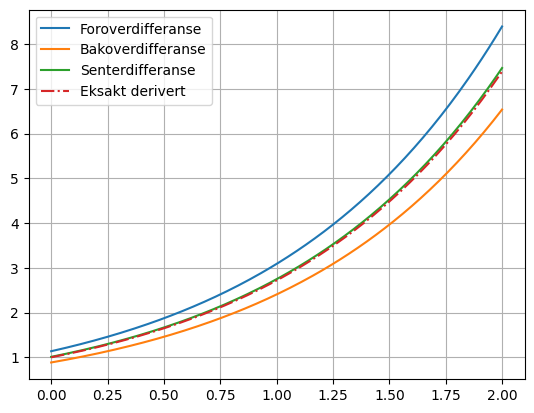

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.close(1) # Lukk figuren med det interaktive plottet.
%matplotlib inline

# Matematisk funksjon f(x) som skal deriveres
def f(x: float) -> float:
    y = np.e**x
    return y

# Ønskede parametre
x = np.linspace(0, 2, 201) # Intervall for utregning av funksjonens deriverte: 0 <= x <= 2
h = 0.25 # Skrittlengde 

# Utførelse av numerisk derivasjon:
df_fwd = (f(x + h) - f(x))/h           # Foroverdifferanse
df_bck = (f(x) - f(x - h))/h           # Bakoverdifferanse
df_cntr = (f(x + h) - f(x - h))/(2*h)  # Senterdifferanse

# Presenter plot av alle tre resultat
plt.plot(x, df_fwd, label="Foroverdifferanse")
plt.plot(x, df_bck, label="Bakoverdifferanse")
plt.plot(x, df_cntr, label="Senterdifferanse")
plt.plot(x, f(x), "-.", label="Eksakt derivert")
plt.grid(True)
plt.legend()